In [ ]:
# kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia 


In [1]:
#lets  try transfer learning
import os 
import shutil
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.27G/2.29G [01:06<00:01, 19.9MB/s]
100% 2.29G/2.29G [01:06<00:00, 37.1MB/s]


In [3]:
from zipfile import ZipFile
fname='chest-xray-pneumonia.zip'
with ZipFile(fname,'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [5]:
train_datagen=image.ImageDataGenerator(
     rescale=1./255
                                      )

test_datagen=image.ImageDataGenerator(
    rescale=1./255
                                       )
valid_datagen=image.ImageDataGenerator(
    rescale=1./255
                                       )

In [6]:
train_path='chest_xray/train'
test_path='chest_xray/test'
valid_path='chest_xray/val'

In [8]:
train_gen=train_datagen.flow_from_directory(
    train_path,
    target_size=(448,448),
    batch_size=32,
)

test_gen=test_datagen.flow_from_directory(
    test_path,
    target_size=(448,448),
    batch_size=32,
)

valid_gen=valid_datagen.flow_from_directory(
    valid_path,
    target_size=(448,448),
    batch_size=32,
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


TypeError: ignored

In [9]:
model=Sequential()

model.add(Conv2D(16,padding='same',kernel_size=(3,3),activation='relu',input_shape=(448,448,3)))
model.add(Conv2D(16,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(32,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(32,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256,padding='same',kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 448, 448, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 448, 448, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 224, 224, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 224, 224, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0

In [11]:
from tensorflow.keras.optimizers import Adam
model.compile(loss=keras.losses.categorical_crossentropy,optimizer="adam",metrics=['accuracy'])

In [12]:
model.fit(train_gen,validation_data=valid_gen,epochs=15,batch_size=64,verbose=2,shuffle=True)

Epoch 1/15
163/163 - 69s - loss: 0.5399 - accuracy: 0.7546 - val_loss: 2.1055 - val_accuracy: 0.6250
Epoch 2/15
163/163 - 68s - loss: 0.3279 - accuracy: 0.8489 - val_loss: 0.2062 - val_accuracy: 0.9375
Epoch 3/15
163/163 - 67s - loss: 0.2340 - accuracy: 0.8972 - val_loss: 0.1069 - val_accuracy: 1.0000
Epoch 4/15
163/163 - 66s - loss: 0.2064 - accuracy: 0.9051 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 5/15
163/163 - 67s - loss: 0.2130 - accuracy: 0.9114 - val_loss: 0.0568 - val_accuracy: 1.0000
Epoch 6/15
163/163 - 66s - loss: 0.1769 - accuracy: 0.9225 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 7/15
163/163 - 66s - loss: 0.1443 - accuracy: 0.9446 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 8/15
163/163 - 66s - loss: 0.0994 - accuracy: 0.9647 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 9/15
163/163 - 66s - loss: 0.0932 - accuracy: 0.9636 - val_loss: 0.0326 - val_accuracy: 1.0000
Epoch 10/15
163/163 - 65s - loss: 0.0784 - accuracy: 0.9716 - val_loss: 0.0028 - val_accura

In [13]:
predictions=model.predict(test_gen)

In [14]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes,rotation=0)

  if normalize:
    cm=cm.astype('float')/am.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix,without normalization")
  
  print(cm)

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
import itertools
cm=confusion_matrix(y_true=test_gen.classes,y_pred=np.argmax(predictions,axis=-1))

Confusion matrix,without normalization
[[ 37 197]
 [ 59 331]]


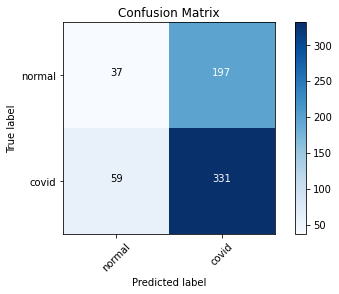

In [17]:
cm_plot_labels=['normal','covid']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [18]:
accuracy_score(y_true=test_gen.classes,y_pred=np.argmax(predictions,axis=-1))

0.5897435897435898

In [ ]:
# model = Sequential()
# model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Flatten())
# model.add(Dense(units = 128 , activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units = 1 , activation = 'sigmoid'))
# model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
# model.summary()

In [20]:
model=Sequential()
model.add(Conv2D(32,(3,3),strides=1,padding='same',activation='relu',input_shape=(300,300,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2),strides=2,padding='same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 2 , activation = 'softmax'))
model.compile(optimizer = "rmsprop" ,loss=keras.losses.categorical_crossentropy , metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 300, 300, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
dropout_8 (Dropout)          (None, 150, 150, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 64)       